<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/Zman42/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis with Pandas and NumPy

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [38]:
data_URI = 'Zman_Pendulum2.csv'
data = pd.read_csv(data_URI, sep=',', index_col=0)
data

,Rotation x (rad/s),Rotation y (rad/s),Rotation z (rad/s)
Time (s),,,
12.606249,-2.457802,-1.677092,-0.449517
12.626334,-2.421485,-1.686955,-0.390214
12.646419,-2.595414,-1.645188,-0.362248
12.666504,-2.907916,-1.557093,-0.356457
12.686589,-3.301158,-1.423567,-0.357161
...,...,...,...
22.548219,-0.007443,-0.021294,0.003260
22.568304,-0.008614,0.003521,-0.002079
22.588389,-0.107142,-0.029578,0.061734


## Model Fitting and Plotting Data

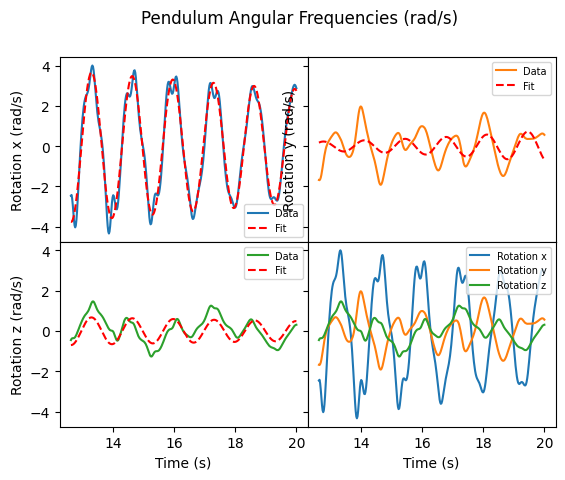

In [63]:
# Filtering the data down to appropriate times
filtered_data = data[data.index < 20]

# Define the function to fit
def damped_cosine(t, A, B, w, phi):
    return A * np.exp(-B * t) * np.cos(w * t + phi)

# Extract time values
t = filtered_data.index.to_numpy()

# Extract data values for x, y, z rotations
y_x = filtered_data['Rotation x (rad/s)'].to_numpy()
y_y = filtered_data['Rotation y (rad/s)'].to_numpy()
y_z = filtered_data['Rotation z (rad/s)'].to_numpy()

# Provide initial guesses for parameters [A, B, w, phi]
initial_guess = [np.max(y_y), 0.05, 2*np.pi/1.31, 0]

# Perform curve fitting
params_x, _ = curve_fit(damped_cosine, t, y_x, p0=initial_guess, maxfev = 5000)
params_y, _ = curve_fit(damped_cosine, t, y_y, p0=initial_guess, maxfev = 5000)
params_z, _ = curve_fit(damped_cosine, t, y_z, p0=initial_guess, maxfev = 5000)

# Generate smooth curve data for plotting
t_fit = np.linspace(min(t), max(t), 500)
fit_x = damped_cosine(t_fit, *params_x)
fit_y = damped_cosine(t_fit, *params_y)
fit_z = damped_cosine(t_fit, *params_z)

# Plotting
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Pendulum Angular Frequencies (rad/s)')


# The first three plots
ax1.plot(filtered_data.index, filtered_data['Rotation x (rad/s)'], label='Data')
ax2.plot(filtered_data.index, filtered_data['Rotation y (rad/s)'], 'tab:orange', label='Data')
ax3.plot(filtered_data.index, filtered_data['Rotation z (rad/s)'], 'tab:green', label='Data')

# Bottom right plot is a combo plot
ax4.plot(filtered_data.index, filtered_data['Rotation x (rad/s)'], label='Rotation x')
ax4.plot(filtered_data.index, filtered_data['Rotation y (rad/s)'], 'tab:orange', label='Rotation y')
ax4.plot(filtered_data.index, filtered_data['Rotation z (rad/s)'], 'tab:green', label='Rotation z')

ax4.legend(loc='upper right', fontsize=7, frameon=True)

# Fitted curves
ax1.plot(t_fit, fit_x, 'r--', label='Fit')
ax2.plot(t_fit, fit_y, 'r--', label='Fit')
ax3.plot(t_fit, fit_z, 'r--', label='Fit')

# Legends
ax1.legend(fontsize=7)
ax2.legend(fontsize=7)
ax3.legend(fontsize=7)

# Lables
ax1.set_ylabel('Rotation x (rad/s)')
ax2.set_ylabel('Rotation y (rad/s)')
ax3.set_ylabel('Rotation z (rad/s)')
ax3.set_xlabel('Time (s)')
ax4.set_xlabel('Time (s)')

plt.show()

## Reporting Results and Errors

The damping factor β was found through itteration while finding the best fit. It was determined to be β = 0.05

The natural frequency ω was found using the period provided by Phyphox. That period was T = 1.31s making the natural frequency ω = 4.80rad/s

In [64]:
# Calculate gravity
def gravitational_acceleration(L, T):
    return (4 * np.pi**2 * L) / (T**2)

# Calculate error
def error_in_gravity(L, T, dL):
    dg = (4 * np.pi**2 / T**2) * dL
    return dg

# Values
Length = 0.349
dL = 0.001
Period = 1.31

g = gravitational_acceleration(Length, Period)
dg = error_in_gravity(Length, Period, dL)

print(f"Calculated gravitational acceleration: {g:.4f} m/s²")
print(f"Error in calculated gravitational acceleration: {dg:.4f} m/s²")

Calculated gravitational acceleration: 8.0287 m/s²
Error in calculated gravitational acceleration: 0.0230 m/s²


Comparing this found value with the accepted value for my area (g = 9.80364 m/s²), the accepted value is not in the error range of the calculated value

A source of error in this experiment could be the fact that my phone was spinning slightly while it swung. This could mess up the measurement of the period. Another source of error could be the fact that I did not use an ideal string. It is possible that, at the turining points, the string relaxed slightly then tightened again. This would also throw off the measurements.